In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import json

SEED = 42
np.random.seed(SEED)

In [195]:
name = 'ai'

In [196]:
models = joblib.load(f'save/models_{name}.pkl')
data = joblib.load(f'save/data_{name}.pkl')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-31 01:42:40         6057
metadata.json                                  2022-12-31 01:42:40           64
variables.h5                                   2022-12-31 01:42:40       210364
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......dense
.........vars
............0
............1
......dense_1
.........vars
.....

In [197]:
print(data['X_train'].shape, data['X_test'].shape)
print()
print('train')
print(data['y_train'].value_counts())
print()
print('test')
print(data['y_test'].value_counts())

(284152, 47) (71038, 47)

train
0    260952
1     23200
Name: TARGET, dtype: int64

test
0    65313
1     5725
Name: TARGET, dtype: int64


In [198]:
def draw(name):
    model = models[name]
    
    if 'Keras' in name:
        y_predict = model.predict(data['X_test'].values.astype('float32'))[:, 1]
    else:
        name_config = name.split(': ')
        name = name_config[0]
        config = json.loads((': ').join(name_config[1:]))
        params = model.get_params()
        hyper = {}
        for key in config:
            hyper[key] = params[key]
        name = f'{name}: {json.dumps(hyper)}'
        y_predict = model.predict_proba(data['X_test'].values.astype('float32'))[:, 1]
        
    y_predict_class = (y_predict >= 0.5).astype(int)
    auc = round(roc_auc_score(data['y_test'], y_predict), 3)
    fig, axs = plt.subplots(ncols=2, figsize=(16,6))
    plt.gca().set_title('title')
    fig.suptitle(f'Модель: {name}\nМетрика AUC для тестовой выборки: {auc}')
    sns.histplot(x=y_predict_class, ax=axs[1])
    ConfusionMatrixDisplay.from_predictions(data['y_test'], y_predict_class, ax=axs[0])
    axs[0].set_title('Ошибки 1/2 рода')
    axs[1].set_title('Распределенение классов')
    return y_predict

2220/2220 [==============================] - 2s 701us/step


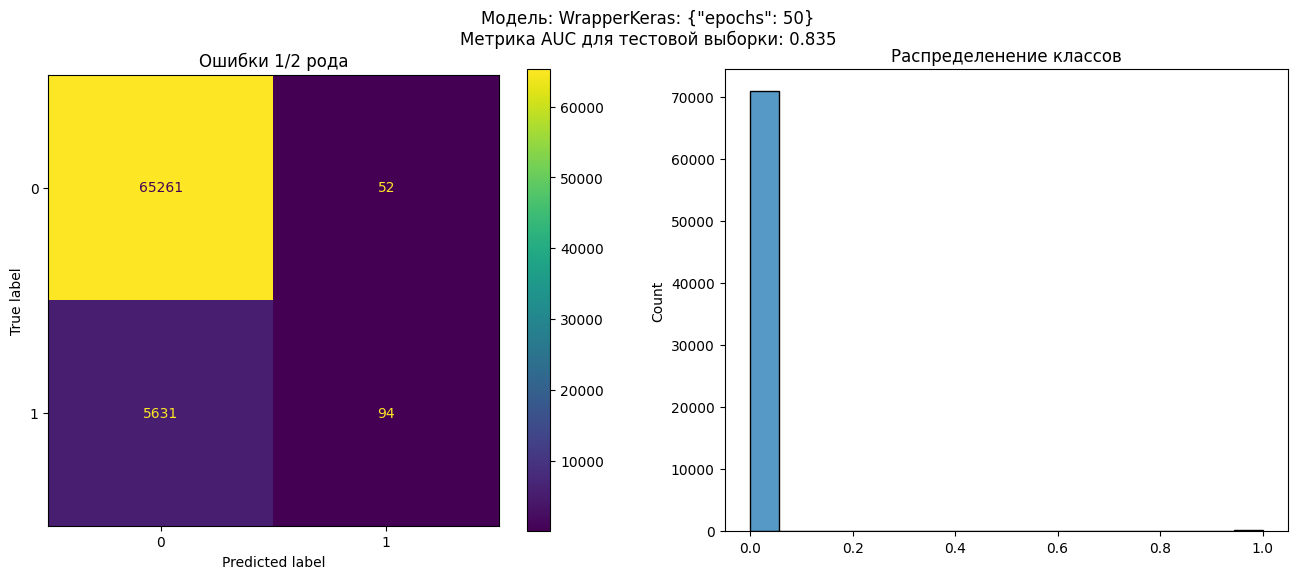

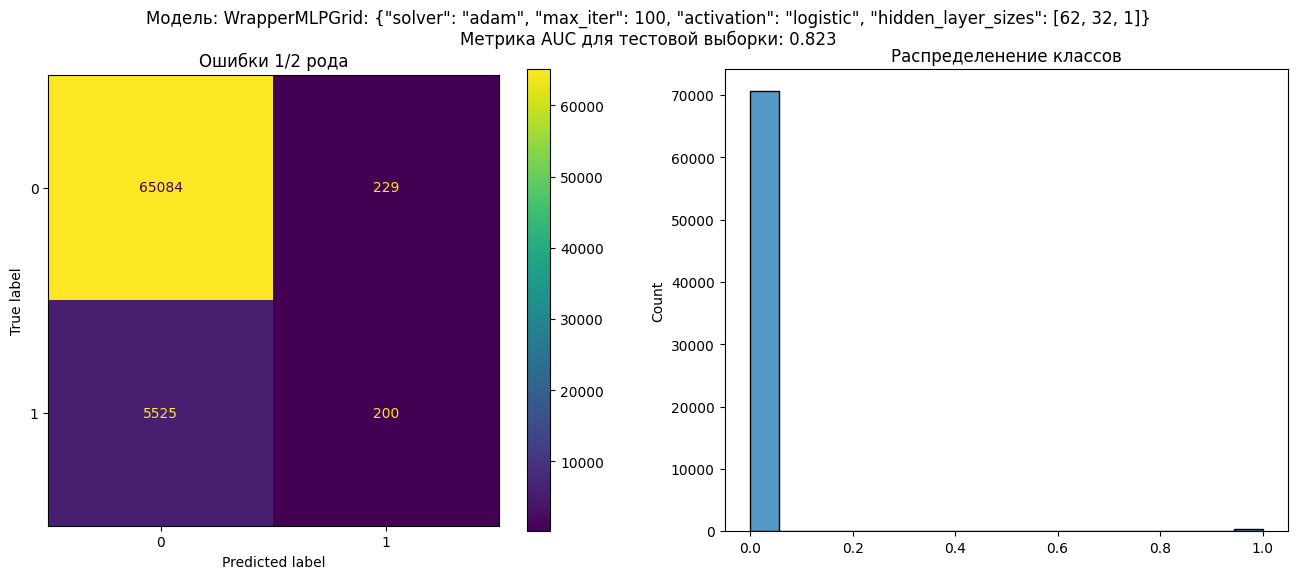

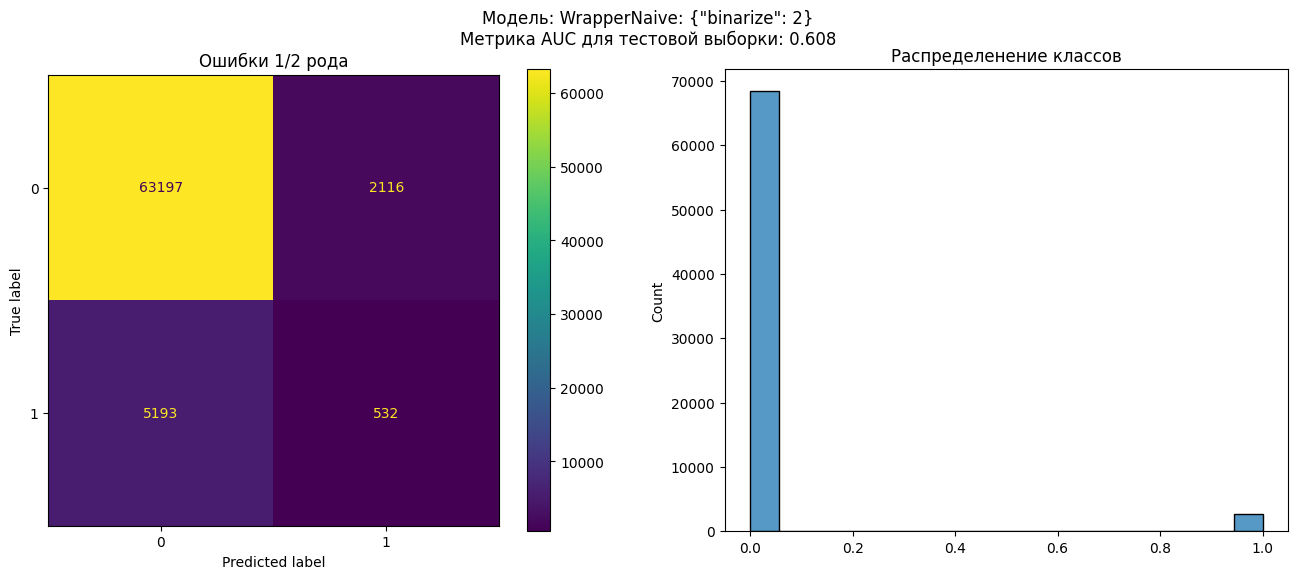

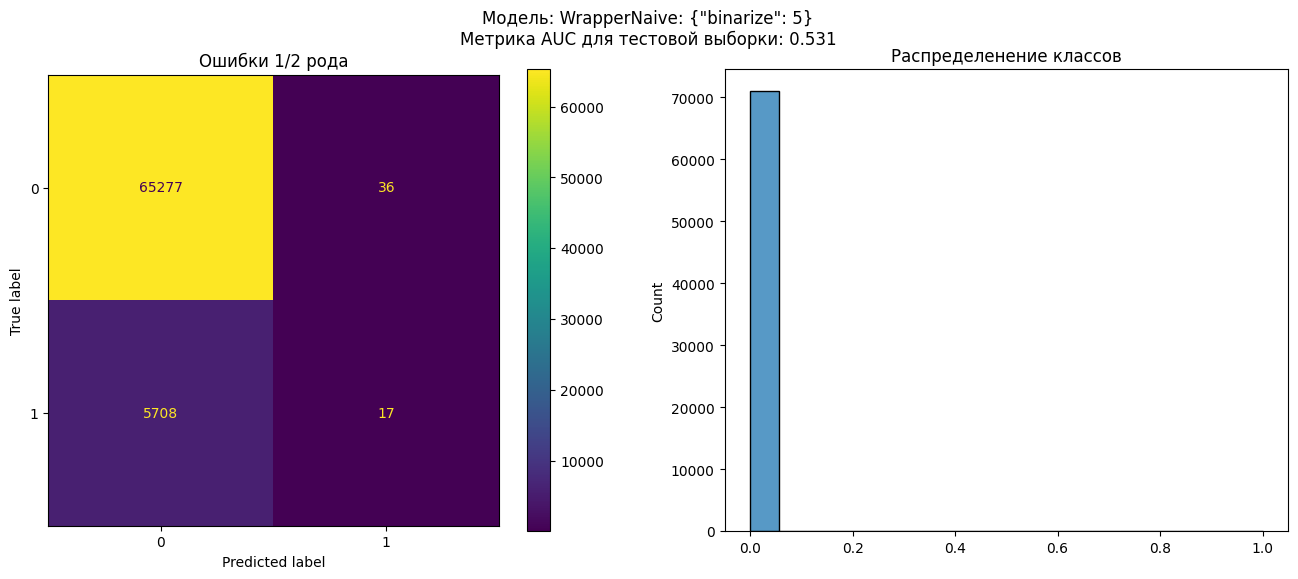

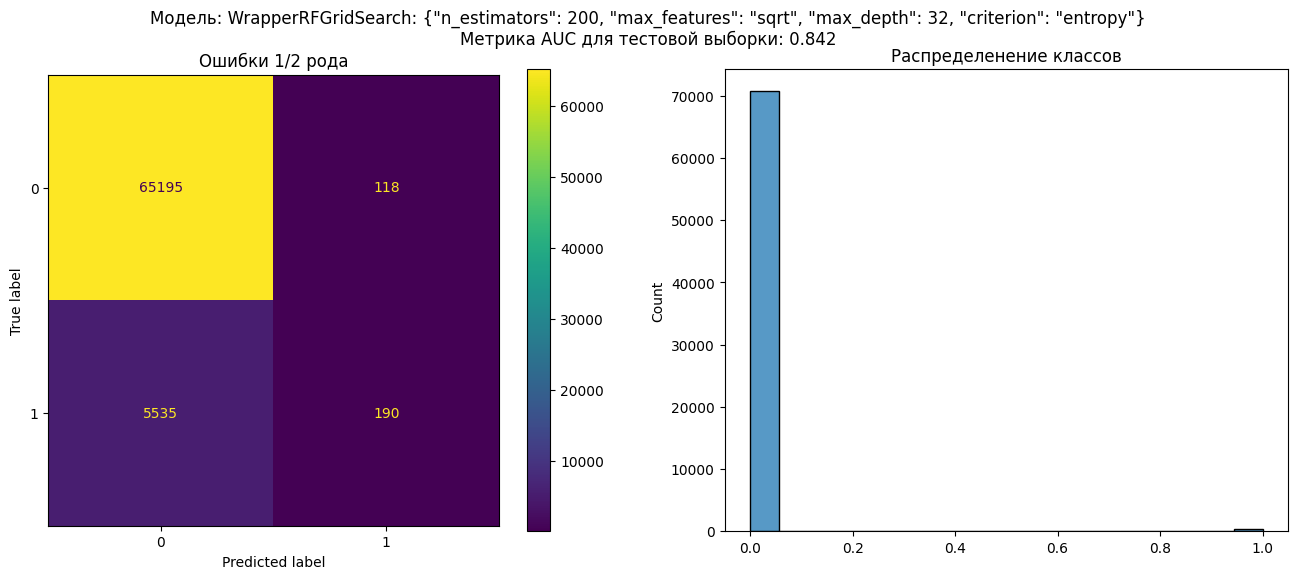

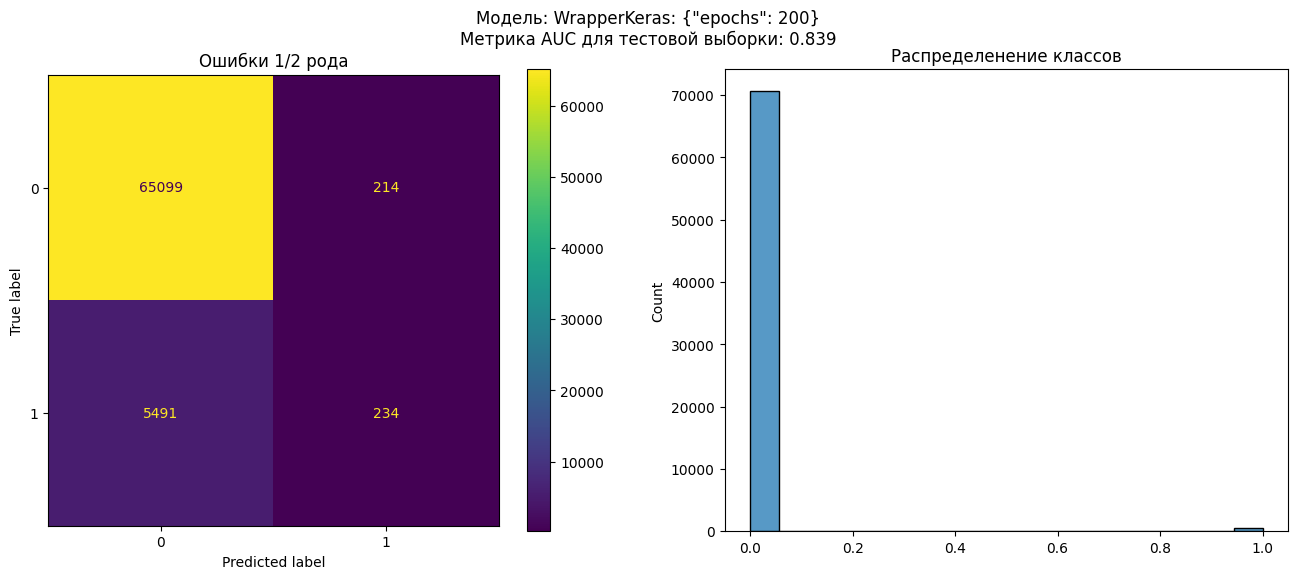

In [194]:
for modelName in list(models.keys()):
    draw(modelName)